<a href="https://colab.research.google.com/github/youssefHosni/Efficient-Python-for-Data-Scientists/blob/main/Make_Your_Pandas_Code_1000_Times_Faster_With_This%C2%A0Trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make Your Pandas Code 1000 Times Faster With This Trick

Pandas is a popular and widely used library in Python for data manipulation and analysis. While it is powerful and flexible, its performance can sometimes become a bottleneck in large datasets. In this article, we will explore a trick to make your Pandas code run much faster, increasing its efficiency by up to 1000 times. 

Whether you are a beginner or an experienced Pandas user, this article will provide you with valuable insights and practical tips for speeding up your code. So, if you want to boost the performance of your Pandas code, read on!

In [ ]:
Table of Content:
Create Dataset & Problem Statment
Level 1: Loops
Level 2: Apply Function
Level 3: Vectorization
Measuring the Difference

In [ ]:
import pandas as pd
import numpy as np

# 1. Create Dataset & Problem Statment 
First, let's create the data we will use throughout this article and compare different methods. The data we will make will have different ages, time in bed and percentage of sleeping, the favorite food, and the least favorite food. 
Let's build a function to get the data given the size:# create Dataset

In [ ]:
def get_data(size= 10000):
    df = pd.DataFrame()
    size = 10000
    df['age'] = np.random.randint(0,100,size)
    df['time_in_bed'] = np.random.randint(0,9,size)
    df['pct_sleeping'] = np.random.randint(size)
    df['favorite_food'] = np.random.choice(['pizza','ice-cream','burger','rice'], size)
    df['hate_food'] = np.random.choice(['milk','vegetables','eggs'])
    return df

In [ ]:
df = get_data()
df.head()

,age,time_in_bed,pct_sleeping,favorite_food,hate_food
0,39,2,2114,ice-cream,eggs
1,92,1,2114,pizza,eggs
2,59,7,2114,ice-cream,eggs
3,26,3,2114,burger,eggs
4,14,3,2114,ice-cream,eggs


Reward calculation:
* If they were in bed for more than 5 hours and they were sleeping more than 50% we will give their favourite food.
* Otherwise we give them their hate food
* If they are over 90 years old give their favorite food regardless

This can be represented using the following equation

In [ ]:
def reward_cal(row):
    if row['age'] >=90:
        return row['favorite_food'] 
    if (row['time_in_bed'] > 5) & (row['pct_sleeping']>0.5):
        return row['favorite_food']
    return row['hate_food']

## Level 1: Loops

The first and straightforward approach is to use for loops to iterate over each row of the data frame. The code below

In [ ]:
df = get_data()

In [ ]:
%%timeit

for index, row in df.iterrows():
   df.loc[index,'reward'] = reward_cal(row)

15.8 s ± 1.61 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


As we can see the computation time used to iterate through every row of the data frame is 15.8 s. Given that the data has only 10000 rows which are considered small. So if the data have millions of rows so it will take hours to do only one task. Therefore this is not the most efficient way to iterate through a data frame. So let's discuss the second method which will improve the time complexity.

## Level 2: Apply

The .apply() method in pandas is used to apply a function to each element in a pandas dataframe. It can be used to apply a custom function to each element in a specific column or to apply a function along either axis (row-wise or column-wise) of the dataframe. Let's use it to apply the reward calculation function to each row of the data frame and then calculate the computational time:

In [ ]:
df = get_data()

In [ ]:
%%timeit
df['reward'] = df.apply(reward_cal, axis = 1)

535 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The average time to apply the function to the 10000 rows of the data frame is only 535 ms which is 0.535 seconds. This is around 15 times faster than using the loops. However, we are still not done. We can still improve the speed and make it 1000 times faster. Let's see how!

## Level 3: Vectorized 

Vectorization in pandas refers to the process of applying operations to entire arrays or sequences of data, as opposed to applying them to individual elements one by one. This is done for performance reasons, as vectorized operations are usually much faster than non-vectorized operations, especially in large datasets.

Let's apply this to the data using the conditions stated above:

In [ ]:
df = get_data()


In [ ]:
%%timeit

df['reward'] = df['hate_food']
df.loc[((df['pct_sleeping']>0.5) &(df['time_in_bed']>5))| (df['age']>90), 'reward'] = df['favorite_food']


5.8 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can see now a tremendous decrease in the computation time compared to the previous two methods. The computation time has at least decreased by 1000. Let's have a look at the differences in a bar plot.

## Plot differences



Finally to have a better intuition of the difference between these different three methods. We will plot a bar plot diagram using the code below:

In [ ]:
results = pd.DataFrame(
    [
        ["Loop", 15800],
        ["apply", 535],
        ['vectorized', 5.8]
        
    ],
    columns = ['method', 'run_time']

)

<AxesSubplot:xlabel='method'>

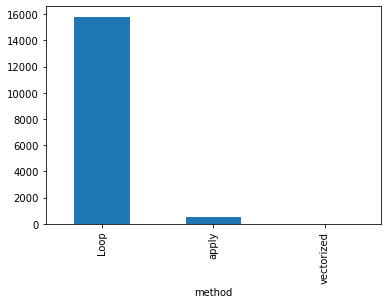

In [ ]:
results.set_index('method')['run_time'].plot(kind='bar')

Looking at the bar plot we can get a better intuition of the huge difference between the different computational times of the different methods used in this article.